***Conjoint Analysis***

We want to understand which combination of attributes & levels of pizza is most and least preferred by customers while choosing or ordering pizza so that the marketing team can enter the market with the best combinations.

The first step is to define the attributes and levels of the product.

We will take eight different attributes, namely ‘brand,’ ‘price,’ ‘weight,’ ‘crust,’ ‘cheese,’ ‘size,’ ‘toppings,’ and ‘spicy,’ where brand, price, and weight have four levels each and rest of the attributes have two levels.

![attribute info](https://av-eks-blogoptimized.s3.amazonaws.com/Capture0001-thumbnail_webp-600x300.png)

The next step is to select the number of combinations or profiles. Here, we have a total 4*4*4*2*2*2*2*2 number of combinations. But we will not use all combinations since the company may not be able to produce some combinations, and the customers may not prefer some combinations. So, we will go with the selected 16 combinations and their rankings from a survey. We will load the dataset in the proper format.

In [14]:
import pandas as pd, numpy as np
df=pd.read_csv('pizza_data.csv')

We will now estimate each attribute level’s effects using Linear Regression Model.

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model='ranking ~ C(brand,Sum)+C(price,Sum)+C(weight,Sum)+C(crust,Sum)+C(cheese,Sum)+C(size,Sum)+C(toppings,Sum)+C(spicy,Sum)'
model_fit=smf.ols(model,data=df).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Sat, 06 Jul 2024   Prob (F-statistic):             0.0794
Time:                        01:13:15   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

C:\Users\Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


We can analyze the model’s fitness using parameters like R-squared, p-values, etc. The coefficients of each attribute level define its effect on the overall choice model.

Now, we will create the list of conjoint attributes.

In [11]:
conjoint_attributes = ['brand','price','weight','crust','cheese','size','toppings','spicy']

Before going ahead, we need to understand these conjoint analysis terminologies:

Relative importance: It depicts which attributes are more or less important when purchasing. E.g., a Mobile Phone’s Relative importance could be Brand 30%, Price 30%, Size 20%, Battery Life 10%, and Color 10%.

Part-Worths/Utility values: The amount of weight an attribute level carries with a respondent. These factors lead to a product’s overall value to consumers.

Next, we will build part-worths information and calculate attribute-wise importance level.

In [15]:
level_name = []
part_worth = []
part_worth_range = []
important_levels = {}
end = 1  # Initialize index for coefficient in params

for item in conjoint_attributes:
    nlevels = len(list(np.unique(df[item])))
    level_name.append(list(np.unique(df[item])))
    
    begin = end
    end = begin + nlevels -1
    
    new_part_worth = list(model_fit.params[begin:end])
    new_part_worth.append((-1)*sum(new_part_worth))
    important_levels[item] = np.argmax(new_part_worth)
    part_worth.append(new_part_worth)
    print(item)
    #print(part_worth)
    part_worth_range.append(max(new_part_worth) - min(new_part_worth))
    # next iteration
print("-------------------------------------------------------------")
print("level name:")
print(level_name)
print("npw with sum element:")
print(new_part_worth)
print("imp level:")
print(important_levels)
print("part worth:")
print(part_worth)
print("part_worth_range:")
print(part_worth_range)
print(len(part_worth))
print("important levels:")
print(important_levels)

brand
price
weight
crust
cheese
size
toppings
spicy
-------------------------------------------------------------
level name:
[['Dominos', 'Onesta', 'Oven Story', 'Pizza hut'], ['$1.00', '$2.00', '$3.00', '$4.00'], ['100g', '200g', '300g', '400g'], ['thick', 'thin'], ['Cheddar', 'Mozzarella'], ['large', 'regular'], ['mushroom', 'paneer'], ['extra', 'normal']]
npw with sum element:
[0.7499999999999993, -0.7499999999999993]
imp level:
{'brand': np.int64(3), 'price': np.int64(0), 'weight': np.int64(0), 'crust': np.int64(0), 'cheese': np.int64(1), 'size': np.int64(1), 'toppings': np.int64(0), 'spicy': np.int64(0)}
part worth:
[[2.220446049250313e-15, 8.881784197001252e-15, -0.25000000000000827, 0.24999999999999717], [0.7500000000000013, 2.1094237467877974e-15, -4.884981308350689e-15, -0.7499999999999986], [5.000000000000002, 2.0000000000000018, -1.2500000000000004, -5.7500000000000036], [1.7499999999999996, -1.7499999999999996], [-0.2500000000000009, 0.2500000000000009], [-0.25000000000000

Now, we will calculate the importance of each attribute.

In [16]:
attribute_importance = []
for i in part_worth_range:
    #print(i)
    attribute_importance.append(round(100*(i/sum(part_worth_range)),2))
print(attribute_importance)

[2.38, 7.14, 51.19, 16.67, 2.38, 2.38, 10.71, 7.14]


Now, we will calculate the part-worths of each attribute level.

In [30]:
part_worth_dict={}
attrib_level={}
for item,i in zip(conjoint_attributes,range(0,len(conjoint_attributes))):
    print("Attribute :",item)
    print("    Relative importance of attribute ",attribute_importance[i])
    print("    Level wise part worths: ")
    for j in range(0,len(level_name[i])):
        print(i)
        print(j)
        print("          {}:{}".format(level_name[i][j],part_worth[i][j]))
        part_worth_dict[level_name[i][j]]=part_worth[i][j]
        attrib_level[item]=(level_name[i])
        #print(j)
part_worth_dict

Attribute : brand
    Relative importance of attribute  2.38
    Level wise part worths: 
0
0
          Dominos:2.220446049250313e-15
0
1
          Onesta:8.881784197001252e-15
0
2
          Oven Story:-0.25000000000000827
0
3
          Pizza hut:0.24999999999999717
Attribute : price
    Relative importance of attribute  7.14
    Level wise part worths: 
1
0
          $1.00:0.7500000000000013
1
1
          $2.00:2.1094237467877974e-15
1
2
          $3.00:-4.884981308350689e-15
1
3
          $4.00:-0.7499999999999986
Attribute : weight
    Relative importance of attribute  51.19
    Level wise part worths: 
2
0
          100g:5.000000000000002
2
1
          200g:2.0000000000000018
2
2
          300g:-1.2500000000000004
2
3
          400g:-5.7500000000000036
Attribute : crust
    Relative importance of attribute  16.67
    Level wise part worths: 
3
0
          thick:1.7499999999999996
3
1
          thin:-1.7499999999999996
Attribute : cheese
    Relative importance of attribute  2.38
  

{'Dominos': 2.220446049250313e-15,
 'Onesta': 8.881784197001252e-15,
 'Oven Story': -0.25000000000000827,
 'Pizza hut': 0.24999999999999717,
 '$1.00': 0.7500000000000013,
 '$2.00': 2.1094237467877974e-15,
 '$3.00': -4.884981308350689e-15,
 '$4.00': -0.7499999999999986,
 '100g': 5.000000000000002,
 '200g': 2.0000000000000018,
 '300g': -1.2500000000000004,
 '400g': -5.7500000000000036,
 'thick': 1.7499999999999996,
 'thin': -1.7499999999999996,
 'Cheddar': -0.2500000000000009,
 'Mozzarella': 0.2500000000000009,
 'large': -0.2500000000000018,
 'regular': 0.2500000000000018,
 'mushroom': 1.1249999999999991,
 'paneer': -1.1249999999999991,
 'extra': 0.7499999999999993,
 'normal': -0.7499999999999993}

In the next step, we will plot the relative importance of attributes.

Text(0, 0.5, 'Importance')

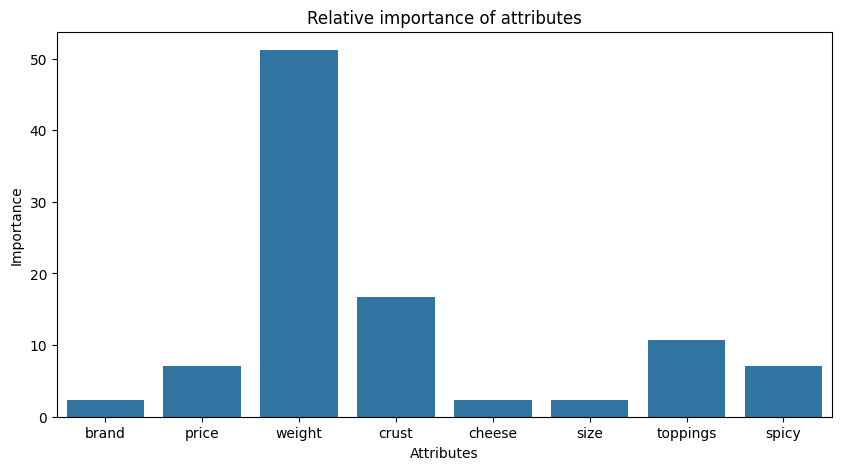

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x=conjoint_attributes,y=attribute_importance)
plt.title('Relative importance of attributes')
plt.xlabel('Attributes')
plt.ylabel('Importance')

We can see that weight is the attribute with the highest relative importance at 51%, followed by crust at 16% and toppings at 10%. Brand, cheese, and size are the least important attributes, each at 2.38%.

Now, we will calculate the utility score for each profile.

In [36]:
utility = []
for i in range(df.shape[0]):
    score = part_worth_dict[df['brand'][i]]+part_worth_dict[df['price'][i]]+part_worth_dict[df['weight'][i]]+part_worth_dict[df['crust'][i]]+part_worth_dict[df['cheese'][i]]+part_worth_dict[df['size'][i]]+part_worth_dict[df['toppings'][i]]+part_worth_dict[df['spicy'][i]]
    utility.append(score)
    
df['utility'] = utility
utility

[2.6250000000000098,
 3.374999999999992,
 0.3750000000000149,
 -6.375000000000003,
 -0.3749999999999998,
 4.374999999999999,
 -1.3749999999999962,
 -4.624999999999999,
 -3.625,
 7.624999999999992,
 -5.374999999999997,
 -2.3750000000000053,
 1.3749999999999927,
 6.375000000000013,
 -7.625000000000013,
 5.624999999999997]

We can see that combination number 9 has the maximum utility, followed by combination numbers 13 and 5. Combination number 14 is the least desirable because of the most negative utility score.

Now, we will find the combination with maximum utility.

In [37]:
print("The profile that has the highest utility score :",'\n', df.iloc[np.argmax(utility)])

The profile that has the highest utility score : 
 brand       Oven Story
price            $4.00
weight            100g
crust            thick
cheese      Mozzarella
size             large
toppings      mushroom
spicy            extra
ranking             16
utility          7.625
Name: 9, dtype: object


Now, we will determine the levels being preferred in each attribute.

In [38]:
for i,j in zip(attrib_level.keys(),range(0,len(conjoint_attributes))):
    #print(i)
    #level_name[j]
    print("Preferred level in {} is :: {}".format(i,level_name[j][important_levels[i]]))

Preferred level in brand is :: Pizza hut
Preferred level in price is :: $1.00
Preferred level in weight is :: 100g
Preferred level in crust is :: thick
Preferred level in cheese is :: Mozzarella
Preferred level in size is :: regular
Preferred level in toppings is :: mushroom
Preferred level in spicy is :: extra
